<a href="https://colab.research.google.com/github/matsonah/ClarkeStatsSpring2022/blob/main/Spring%202022%20Module%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 11


In [ ]:
### Code Block 0: Make a hypothesis
# What populations are you investigating? What do you suppose is true? 



The p-value of this test is 0.0004098426 which is like flipping 11 coins and getting all heads.


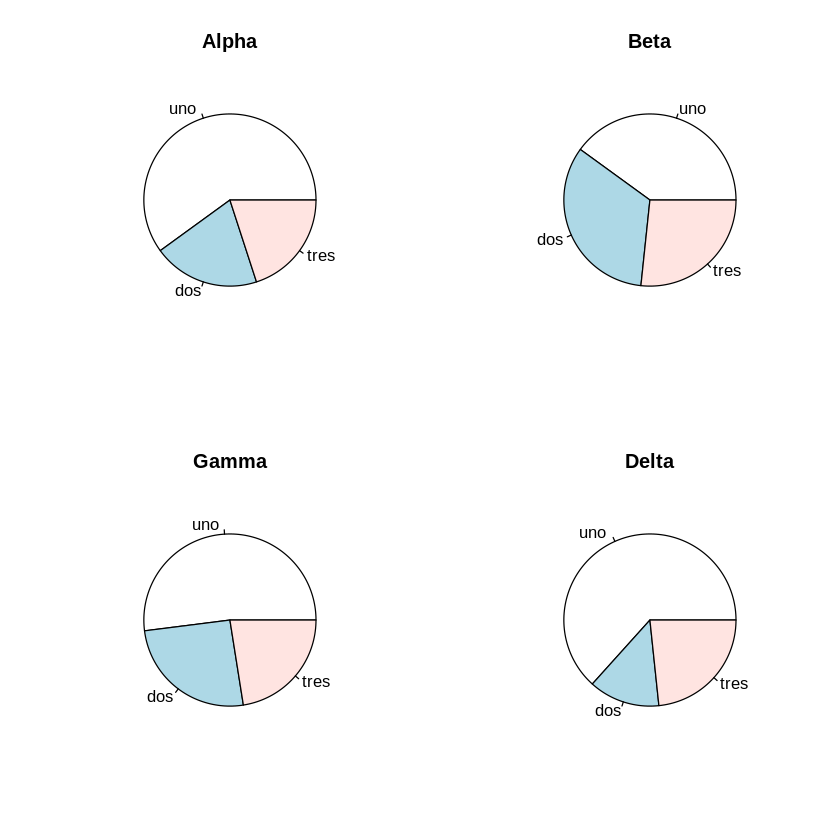

In [144]:
### Code Block 1: Counts of Data in Subtypes 

#### Data format for upload:   
# first row: (blank) (category 1) (category 2) (category 3) .. 
# next rows: (population 1) (count of cat. 1 in pop. 1) (count of cat. 2 in pop. 1) ... 
# The default data came from three populations: uno, dos, and tres. 
# Each population was counted by subpopulation for features Alpha, Beta, Gamma, and Delta. 
# This test checks to see if the ratio A:B:G:D is the same across populations or if one of the populations is not like the others. 

mydata = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/chisq_testdata.csv"))

groups = mydata[,1]
chi_data = mydata[,-1] 

results = chisq.test(chi_data)

pval = results$p.value
sval = -log2(pval)
cat(sep="","The p-value of this test is ", if(pval ==1) "super close to 1" else if (pval < 0.00001) "really tiny" else pval, " which is like flipping ", if (sval <1) 1 else if (sval == Inf) "a whole lot of" else round(sval), " coins and getting all heads.\n")

par(mfrow=c(2,2))
for (i in 1:length(names(chi_data))){
  pie(chi_data[,i], labels = groups, main=names(chi_data[i]))
}


In [145]:
#### Code Block 2: Individual observations by groups
mydata = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/Fake_Data_MTOR.csv"))
#mydata = read.csv(url("https://raw.githubusercontent.com/matsonah/ClarkeStatsSpring2022/main/data/anova_test.csv"))

names(mydata)

[1] "Group"                       "Change.in.GA.Proportion"    
[3] "Pre.Training.GA.Proportion"  "Post.Training.GA.Proportion"

The p-value of this test is really tiny which is like flipping 141 coins and getting all heads.


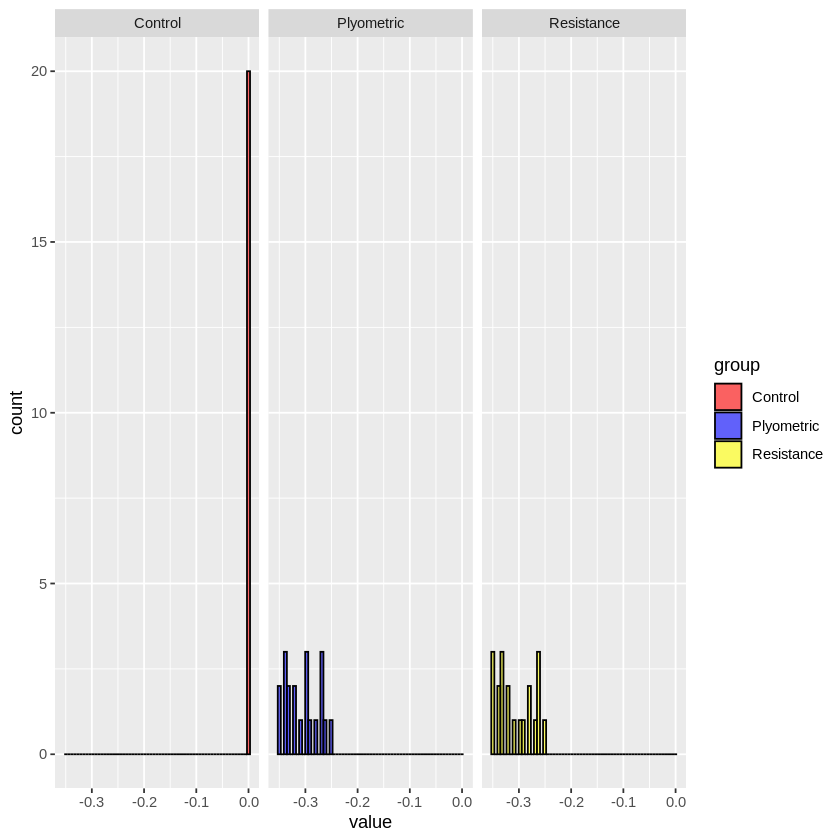

In [146]:
#### Code Block 3: Processes the data that was just loaded. 
###### file format: (Group in column 1) (Values in column 2)


mydata$group = mydata[,1]
mydata$value = mydata[,2]

anovadata = anova(lm(value ~ group, mydata))

pval = anovadata$'Pr(>F)'[1]
sval = -log2(pval)
cat(sep="","The p-value of this test is ", if(pval ==1) "super close to 1" else if (pval < 0.00001) "really tiny" else pval, " which is like flipping ", if (sval <1) 1 else if (sval == Inf) "a whole lot of" else round(sval), " coins and getting all heads.\n")

library(ggplot2)

width = (max(mydata$value)-min(mydata$value))/(length(mydata$value))

ggplot(mydata, aes(x=value, fill=group)) + 
  geom_histogram( color="black", alpha=0.6, position = 'identity', binwidth = width) +   #change bindwidth to be nice.
  scale_fill_manual(values=c("red", "blue", "yellow")) + 
  facet_wrap(~group)
